# Music Genre Classification

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Features_3_sec.csv')
df.shape
print(df)

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [3]:
df.shape

(9990, 60)

In [4]:
df.head(20)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [6]:
ser = df.isnull().sum()
null_val_columns = list(ser[ser != 0].index)
null_val_columns

[]

##  Class Distribution
 - Visualize the distribution of classes (music genres) to understand how balanced or imbalanced the dataset is.
 - A countplot shows the number of instances for each genre. This is useful for identifying imbalances in the dataset, which can impact classification models. For example, if one genre is underrepresented, it might need data augmentation or re-sampling.

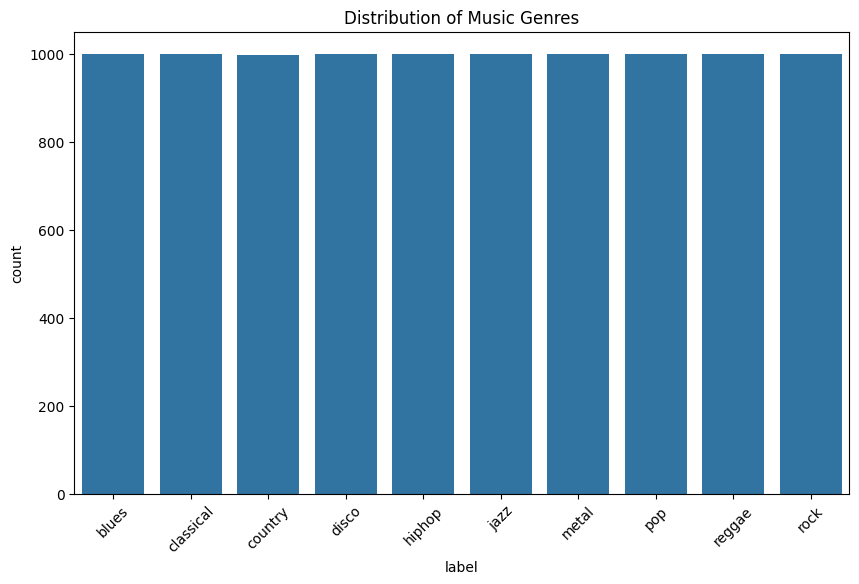

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Distribution of Music Genres')
plt.xticks(rotation=45)
plt.show()

## Histogram for Key Features
- Let’s examine the distribution of features like length, rms_mean, and spectral_centroid_mean across the dataset. Histograms are useful for spotting the overall distribution and skewness of these features.


/var/folders/cm/3jt71z4n6jscbxbbby9txn_c0000gn/T/ipykernel_38427/3628004978.py:5: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap with title


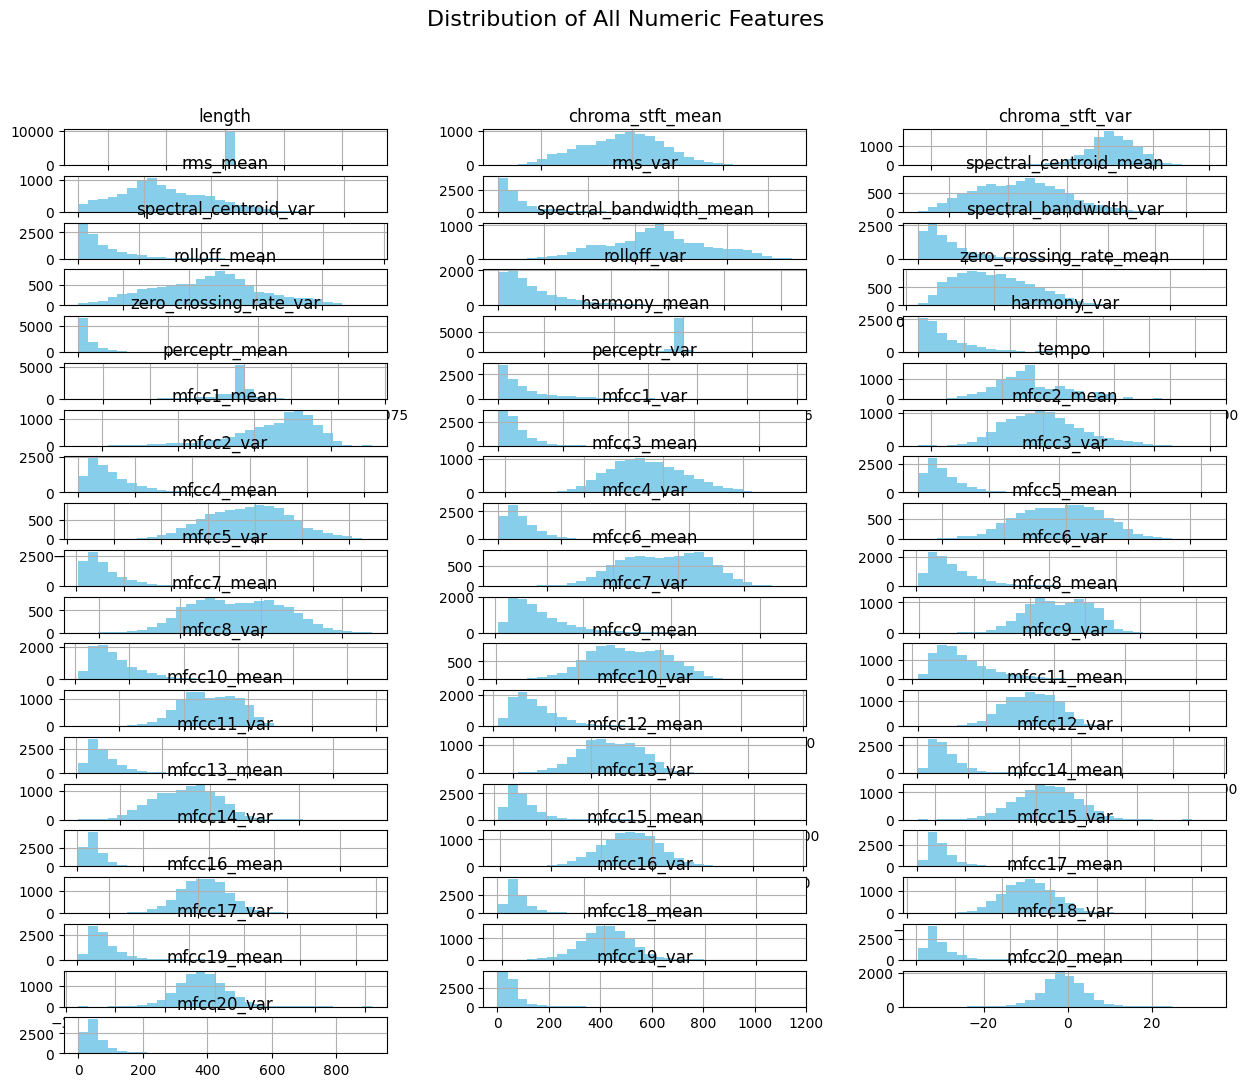

In [8]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns].hist(bins=30, figsize=(15, 12), color='skyblue', layout=(len(numeric_columns) // 3 + 1, 3))
# Add a super title for all subplots
plt.suptitle('Distribution of All Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap with title
plt.show()

## BOXPLOT
 - Compact Overview: Viewing all columns together gives a quick summary of the dataset's general distribution and allows you to spot features with different scales or unusually distributed data at a glance.
- Easier Comparison: You can quickly compare ranges and outliers across  
  multiple features.


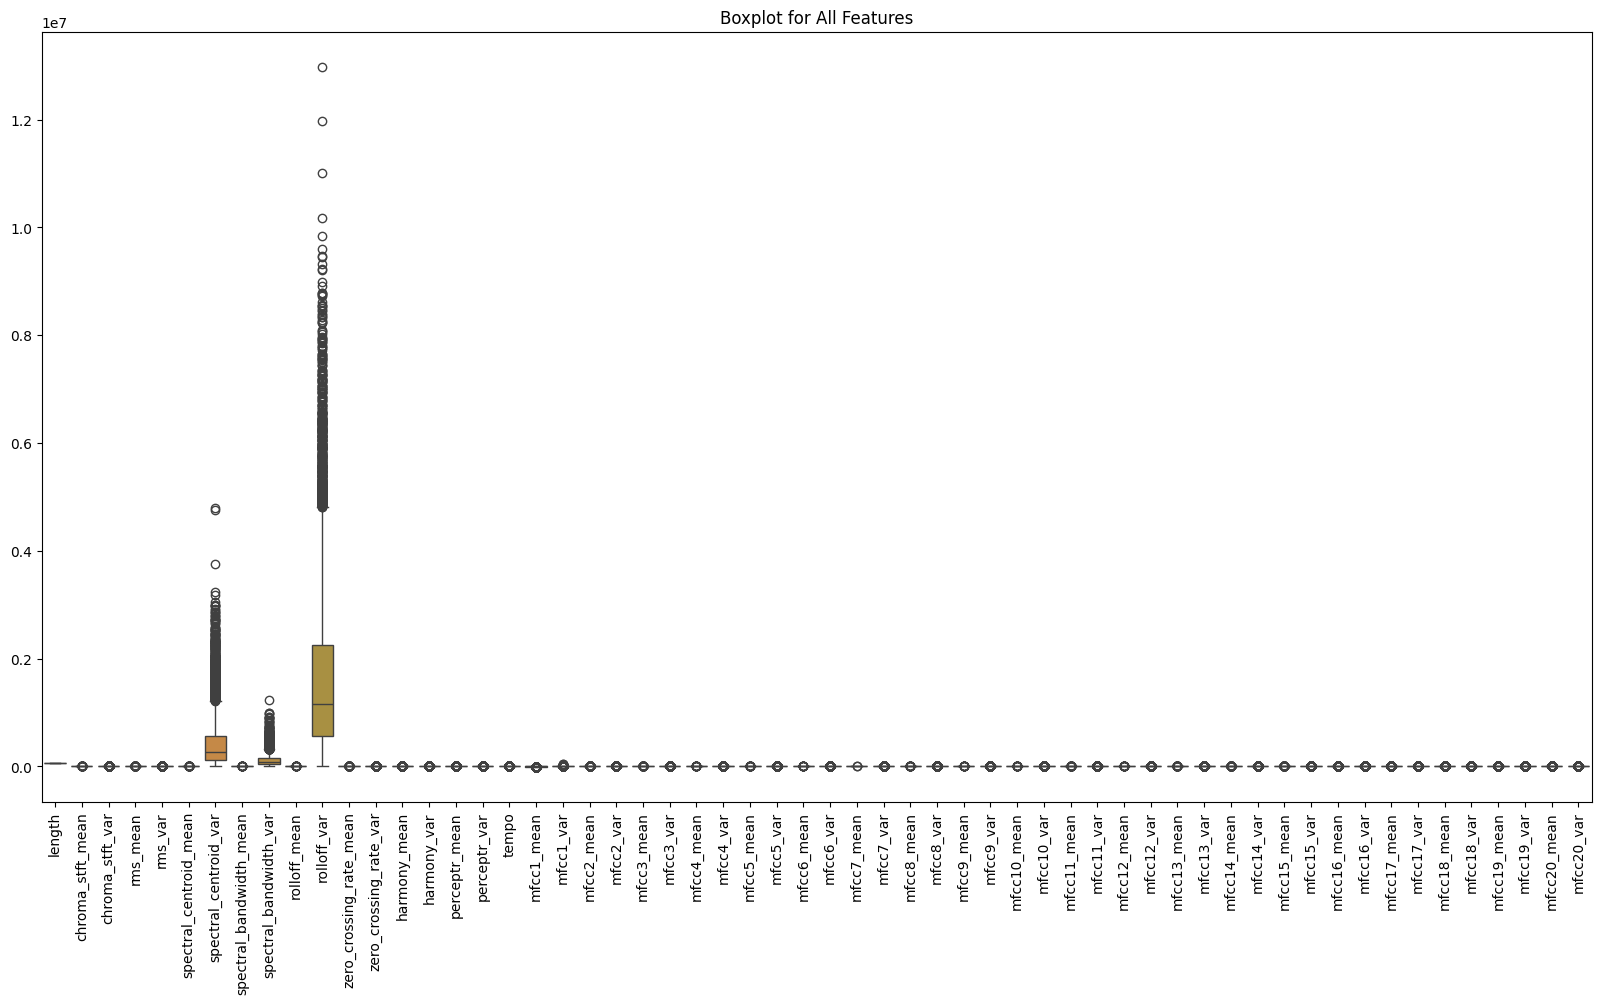

In [9]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot for All Features')
plt.xticks(rotation=90, fontsize=10)
plt.show()

## From the above graph we can see the there are columns such as spectral_centroid_mean, spectral_bandwidth_mean, and rolloff_mean show noticeable outliers, as their points lie significantly beyond the whiskers.

In [10]:
def detect_outliers_iqr(data):
    outliers_count = {}
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:  # Only consider numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            outliers_count[col] = len(outliers)
            
    return outliers_count
    
outliers_counts = detect_outliers_iqr(df.select_dtypes(include='number'))
print("Outliers count for each feature:")
for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Outliers count for each feature:
length: 0 outliers
chroma_stft_mean: 39 outliers
chroma_stft_var: 279 outliers
rms_mean: 78 outliers
rms_var: 904 outliers
spectral_centroid_mean: 40 outliers
spectral_centroid_var: 593 outliers
spectral_bandwidth_mean: 18 outliers
spectral_bandwidth_var: 443 outliers
rolloff_mean: 20 outliers
rolloff_var: 445 outliers
zero_crossing_rate_mean: 77 outliers
zero_crossing_rate_var: 906 outliers
harmony_mean: 2175 outliers
harmony_var: 533 outliers
perceptr_mean: 1461 outliers
perceptr_var: 632 outliers
tempo: 175 outliers
mfcc1_mean: 319 outliers
mfcc1_var: 442 outliers
mfcc2_mean: 119 outliers
mfcc2_var: 441 outliers
mfcc3_mean: 64 outliers
mfcc3_var: 429 outliers
mfcc4_mean: 18 outliers
mfcc4_var: 389 outliers
mfcc5_mean: 26 outliers
mfcc5_var: 402 outliers
mfcc6_mean: 12 outliers
mfcc6_var: 399 outliers
mfcc7_mean: 2 outliers
mfcc7_var: 407 outliers
mfcc8_mean: 24 outliers
mfcc8_var: 373 outliers
mfcc9_mean: 13 outliers
mfcc9_var: 381 outliers
mfcc10_me

In [11]:
numeric_df = df.select_dtypes(include='number')

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

In [12]:
mean_with_outliers = numeric_df.mean()
mean_without_outliers = numeric_df[~outliers.any(axis=1)].mean()
print("Difference in mean values:\n", mean_with_outliers - mean_without_outliers)


Difference in mean values:
 length                          0.000000
chroma_stft_mean               -0.011156
chroma_stft_var                 0.001886
rms_mean                        0.000223
rms_var                         0.000943
spectral_centroid_mean         13.768624
spectral_centroid_var      138330.862830
spectral_bandwidth_mean         5.963608
spectral_bandwidth_var      22312.799151
rolloff_mean                   -4.721180
rolloff_var                397506.346481
zero_crossing_rate_mean         0.000400
zero_crossing_rate_var          0.000989
harmony_mean                   -0.000351
harmony_var                     0.001478
perceptr_mean                  -0.000239
perceptr_var                    0.000951
tempo                           0.693671
mfcc1_mean                    -24.813641
mfcc1_var                     841.988393
mfcc2_mean                     -2.373629
mfcc2_var                     150.209060
mfcc3_mean                      4.015742
mfcc3_var                    

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

capped_df = numeric_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

mean_with_capped_outliers = capped_df.mean()

print("\nMean with outliers:\n", mean_with_outliers)
print("\nMean without outliers:\n", mean_without_outliers)
print("\nMean with capped outliers:\n", mean_with_capped_outliers)

df[numeric_df.columns] = capped_df


Mean with outliers:
 length                     6.614900e+04
chroma_stft_mean           3.795341e-01
chroma_stft_var            8.487615e-02
rms_mean                   1.308591e-01
rms_var                    2.676388e-03
spectral_centroid_mean     2.199219e+03
spectral_centroid_var      4.166727e+05
spectral_bandwidth_mean    2.241386e+03
spectral_bandwidth_var     1.182711e+05
rolloff_mean               4.566077e+03
rolloff_var                1.628790e+06
zero_crossing_rate_mean    1.025785e-01
zero_crossing_rate_var     2.620121e-03
harmony_mean              -3.646305e-04
harmony_var                1.259757e-02
perceptr_mean             -3.955016e-04
perceptr_var               5.601553e-03
tempo                      1.248877e+02
mfcc1_mean                -1.454246e+02
mfcc1_var                  2.808904e+03
mfcc2_mean                 1.009882e+02
mfcc2_var                  5.887954e+02
mfcc3_mean                -9.995014e+00
mfcc3_var                  3.741376e+02
mfcc4_mean        

### Summary of Outlier Effects on Audio Features

1. **Impact of Outliers on Mean and Variance**
   - **High Variance with Outliers**: Features like `spectral_centroid_var`, `rolloff_var`, `mfcc1_var`, and `mfcc2_var` show high variance when outliers are present, indicating they’re skewed by extreme values.
   - **Lower Variance without Outliers**: Removing outliers centralizes mean values and reduces variance, stabilizing these features.

2. **Effect of Capping Outliers**
   - **Closer to No-Outliers Mean**: Capping brings means closer to the no-outliers dataset, reducing skew without data loss.
   - **Moderate Variance Reduction**: Variance in capped features (e.g., `spectral_centroid_var`, `rolloff_var`, `mfcc2_var`) falls between full outliers and no outliers, providing a balanced approach.

3. **Less Impact on Core Features**
   - Features like `rms_mean`, `zero_crossing_rate_mean`, `chroma_stft_mean` show minor changes across all approaches, indicating they’re more robust against outliers.

### Overall Observations
- **Trade-off**: Removing outliers reduces skew but loses data. Capping is a balanced option, controlling extreme values while retaining data.
- **Sensitive Features**: Spectral and MFCC features benefit most from outlier handling due to their high sensitivity to variability.


This code fills missing values in specific columns of a DataFrame (`df`) with the mean of each group, based on a categorical label.

1.  **Loop Through Columns**\
    `for col in null_val_columns:`\
    Iterates over columns with missing values, as specified in `null_val_columns`.

2.  **Calculate Group Means**\
    `group_means = df.groupby('label')[col].transform('mean')`\
    Groups `df` by the `'label'` column and calculates the mean of `col` for each group. The `transform('mean')` function aligns the group means to match the shape of `df`.

3.  **Fill Null Values**\
    `df[col] = df[col].fillna(group_means)`\
    Fills missing values in `col` with the corresponding group mean, ensuring that each missing value is replaced by a relevant average.

In [14]:
for col in null_val_columns:
    group_means = df.groupby('label')[col].transform('mean')
    df[col] = df[col].fillna(group_means)

In [15]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

This code extracts specific parts of each filename in the DataFrame. It creates two new columns:

1.  `part`: Contains a character extracted from the end of each filename.
2.  `rootfile`: Contains the base filename without any numeric suffix or `.wav` extension.

This helps in organizing and identifying different parts of each filename.

In [16]:
df['part'] = df['filename'].apply(lambda x : x[-5])

df['rootfile'] = df['filename'].apply(lambda x: re.sub(r"\.\d+\.wav$", "", x))
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,part,rootfile
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,0,blues.00000
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,1,blues.00000
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,2,blues.00000
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,3,blues.00000
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,4,blues.00000


The code uses LabelEncoder from sklearn.preprocessing to convert categorical labels in the label column of df into numerical form.

encoder.fit_transform(df['label']) fits the encoder to the unique labels in the label column and transforms them into integer values. The transformed labels are stored in label_new.

The transformed labels replace the original label column in df.

encoded_list = encoder.classes_ retrieves the unique labels in their original form, stored in the order they were encoded.

This process is useful for preparing categorical labels for machine learning algorithms that require numerical input.

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

label_new = encoder.fit_transform(df['label'])
df['label'] = label_new

encoded_list = encoder.classes_

In [18]:
encoded_list

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [19]:
df = df.drop(['filename'], axis=1)

df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,part,rootfile
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0,0,blues.00000
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0,1,blues.00000
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0,2,blues.00000
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0,3,blues.00000
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0,4,blues.00000


In [20]:
df.describe()

len(df.columns)

61

### Purpose of the Description

The main purpose of this description is to explain how to create a heatmap visualization to analyze correlations between numeric features and a target label in a dataset using `seaborn` and `matplotlib`. Key steps and components are highlighted:

- **Library Imports**: Importing `seaborn` and `matplotlib.pyplot` for data visualization.
- **Figure Size**: Setting a large figure size (`plt.figure(figsize=(20, 50))`) to display detailed correlation data.
- **Heatmap Generation**: Using `sns.heatmap()` to create a heatmap that shows the correlations between all numeric features and the target column (`label`).
- **Correlation Calculation**: Computing correlations of numeric features with the target column using `df.corr(numeric_only=True)[['label']]`.
- **Annotations and Color Map**: Adding correlation values as annotations (`annot=True`) and using a 'coolwarm' color map to visually distinguish between negative and positive correlations.

This visualization aids in identifying which numeric features are most strongly correlated with the label, supporting feature selection or further analysis.


<Axes: >

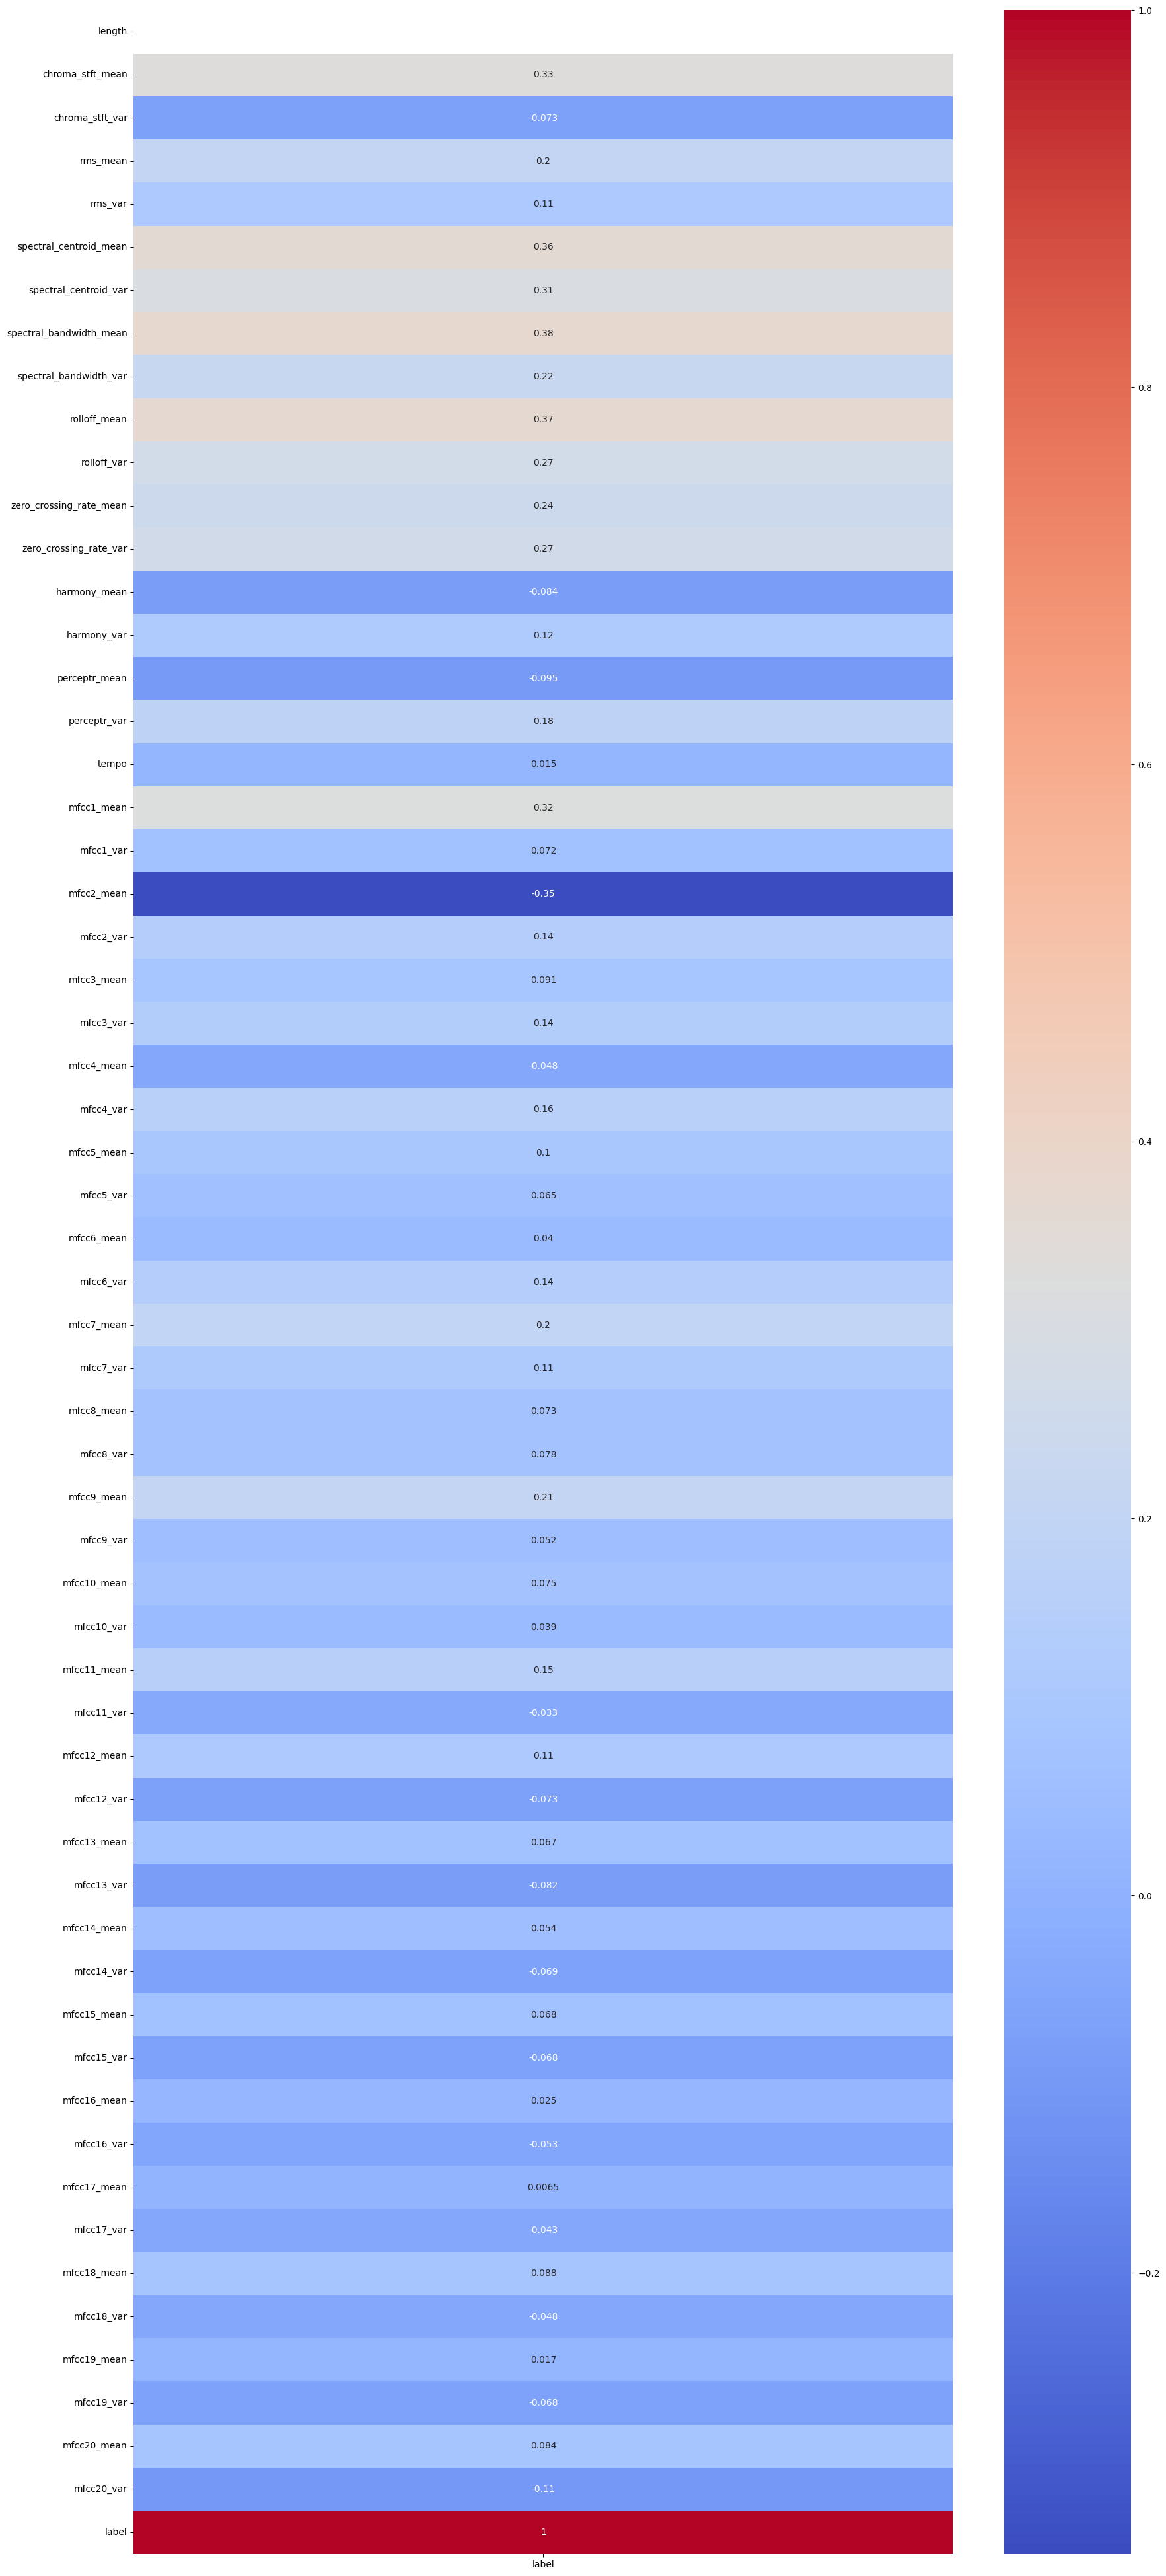

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))
sns.heatmap(df.corr(numeric_only=True)[['label']], annot=True, cmap='coolwarm')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [23]:
X = df.drop(['label', 'length'], axis=1)
Y = df['label']


### Summary

This code snippet standardizes numeric features in a DataFrame `X` using `StandardScaler` from `sklearn`. It selects only numeric columns, scales them to have a mean of 0 and a variance of 1, and then converts the scaled data back into a DataFrame. This standardization is useful for ensuring that features are on a similar scale, which can improve the performance of many machine learning models.

In [24]:
from sklearn.preprocessing import StandardScaler

numeric_X = X.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()

X_scaled = scaler.fit_transform(numeric_X)

X_scaled = pd.DataFrame(X_scaled, columns=numeric_X.columns)

In [25]:
# numeric_X = X_scaled.select_dtypes(include=['float64', 'int64'])

# means = numeric_X.mean()
# std_devs = numeric_X.std()

# X_scaled_manual = (numeric_X - means) / std_devs

# X_scaled_manual = pd.DataFrame(X_scaled_manual, columns=numeric_X.columns)

# print(X_scaled_manual)

In [26]:
# from sklearn.decomposition import PCA
# pca = PCA(0.95)

# X_reduced = pca.fit_transform(X_scaled)

# X_reduced = pd.DataFrame(X_reduced)
# X_reduced.head()

In [27]:
X_scaled['rootfile'] = df['rootfile']

In [28]:
X_scaled.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,...,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9990.000000,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03
mean,-7.966045e-17,1.109556e-15,5.690032e-17,9.104051e-17,-3.186418e-16,3.414019e-17,2.503614e-16,7.966045e-17,-9.104051e-17,4.552026e-17,...,-5.690032e-18,6.828038e-17,3.698521e-17,4.552026e-17,0.000000,6.685788e-17,-1.564759e-17,-8.535048e-18,3.983022e-17,2.276013e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.816876e+00,-2.466929e+00,-1.912874e+00,-1.055043e+00,-2.310621e+00,-1.121016e+00,-2.586070e+00,-1.333855e+00,-2.382285e+00,-1.205289e+00,...,-2.668359e+00,-1.955301e+00,-2.662731e+00,-1.852144e+00,-2.581640,-1.734236e+00,-2.584541e+00,-1.717087e+00,-2.527267e+00,-1.713473e+00
25%,-7.072492e-01,-5.830284e-01,-6.910169e-01,-7.632983e-01,-7.594621e-01,-7.681804e-01,-6.514562e-01,-7.691883e-01,-7.238023e-01,-7.761566e-01,...,-6.653958e-01,-7.551117e-01,-6.778274e-01,-7.487675e-01,-0.648282,-7.423400e-01,-6.566424e-01,-7.469437e-01,-6.270026e-01,-7.523123e-01
50%,5.888141e-02,5.377879e-03,-1.382545e-01,-3.470869e-01,1.474916e-02,-3.591581e-01,-2.005952e-02,-2.803153e-01,4.024503e-02,-3.146533e-01,...,2.346609e-03,-2.404708e-01,-3.518404e-02,-2.591784e-01,0.005774,-2.806253e-01,-3.302175e-02,-2.893417e-01,-2.147999e-02,-2.893142e-01
75%,6.991686e-01,6.729054e-01,6.741813e-01,4.312584e-01,6.898385e-01,4.980950e-01,6.382866e-01,5.338558e-01,6.257537e-01,5.325037e-01,...,6.699130e-01,5.058372e-01,6.454415e-01,4.942797e-01,0.640623,4.842510e-01,6.286232e-01,4.849504e-01,6.398403e-01,4.826819e-01
max,2.808795e+00,2.556806e+00,2.721979e+00,2.223093e+00,2.863790e+00,2.397508e+00,2.572901e+00,2.488422e+00,2.650088e+00,2.495494e+00,...,2.672876e+00,2.397261e+00,2.630345e+00,2.358851e+00,2.573981,2.324138e+00,2.556521e+00,2.332792e+00,2.540105e+00,2.335173e+00


### Summary

This function, `split_data_by_file`, splits data into train and test sets based on unique file identifiers in a specified column (`file_column`). Key steps include:

1. **Identify Unique Files**: Retrieves unique file identifiers from `X`.
2. **Train-Test Split by Files**: Uses `train_test_split` to split files into train and test groups.
3. **Create Data Splits**: Creates train and test indices based on file assignments, then splits both `X` and `Y` accordingly.

This approach ensures that all data associated with a particular file remains either in the training or test set, preserving file-based grouping during the split.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data_by_file(X, Y, file_column, test_size=0.2, random_state=None):
    # Get unique file identifiers
    unique_files = X[file_column].unique()

    # Split files into train and test groups
    train_files, test_files = train_test_split(
        unique_files, test_size=test_size, random_state=random_state
    )

    # Create train and test sets based on file assignments
    train_indices = X[file_column].isin(train_files)
    test_indices = X[file_column].isin(test_files)

    # Use the indices to split both X and Y
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    return X_train, X_test, Y_train, Y_test

# Example usage:
# Assuming `X` and `Y` are your features and labels DataFrames and "file_id" is the column identifying each file in X
X_train, X_test, Y_train, Y_test = split_data_by_file(X_scaled, Y, file_column="rootfile", test_size=0.2)

### Summary

This dictionary, `models`, defines three machine learning models along with their respective hyperparameter grids for tuning:

1. **Random Forest**: Uses `RandomForestClassifier` with parameters for tuning the number of estimators (`n_estimators`) and maximum depth (`max_depth`).
2. **Support Vector Machine (SVM)**: Uses `SVC` with parameters for tuning the regularization parameter (`C`) and kernel type (`kernel`).
3. **K-Nearest Neighbors (KNN)**: Uses `KNeighborsClassifier` with a parameter grid for tuning the number of neighbors (`n_neighbors`).

Each model can be paired with grid search or similar techniques to optimize these hyperparameters.


In [30]:
models = {
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'param_grid':  {'model__n_estimators': [50, 100, 150], 'model__max_depth': [10, 15, 20]}
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {'model__C' : [1, 5, 10], 'model__kernel' : ['rbf', 'linear', 'sigmoid']}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'model__n_neighbors': [10, 50, 100, 250, 500]}
    }
}

In [31]:
X_train = X_train.drop(columns=['rootfile'])
X_test = X_test.drop(columns=['rootfile'])

In [32]:
X_train.shape

(7994, 57)

In [33]:
X_test.shape

(1996, 57)

****
### Summary

This code performs hyperparameter tuning for each model in the `models` dictionary using `GridSearchCV` and stores the best results:

1. **Pipeline Creation**: A pipeline is created for each model to standardize model setup.
2. **Grid Search Setup**: `GridSearchCV` is configured with cross-validation (cv=5) and accuracy scoring, using each model's hyperparameter grid.
3. **Model Fitting and Storage**: For each model, the grid search is fitted to `X_train` and `Y_train`. The best estimator, parameters, and score are saved in the `best_models` dictionary.
4. **Results Output**: For each model, the best score and parameters are printed.

This process optimizes each model's parameters and provides a summary of the best configuration for each.


In [ ]:
best_models = {}
for model_name, model_info in models.items():
    # Create a pipeline for each model
    pipe = Pipeline([('model', model_info['model'])])

    # Set up GridSearchCV
    grid = GridSearchCV(pipe, param_grid=model_info['param_grid'], cv=5, scoring='accuracy')

    # Fit the grid search
    grid.fit(X_train, Y_train)

    # Store the best model and its parameters
    best_models[model_name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

# Output the results
for model_name, model_info in best_models.items():
    print(f"Model: {model_name}")
    print(f"Best Score: {model_info['best_score']}")
    print(f"Best Params: {model_info['best_params']}")
    print("\n")

# model = RandomForestClassifier(n_estimators=150, max_depth=15)
# model.fit(X_train, Y_train)



****
-   **Purpose**: `best_models['SVM']['best_estimator'].score(x_test, y_test)` calculates the accuracy of the best SVM model on `x_test` and `y_test`.
-   **Explanation**: The `.score()` method of the SVM model, returned by `GridSearchCV`, uses `x_test` and `y_test` to compute and return the model's accuracy.

This gives an accuracy score for the best SVM model's performance on unseen test data, helping to assess its generalization.

In [ ]:
best_models['SVM']['best_estimator'].score(X_test, Y_test)

0.7205808713069605

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, best_models['SVM']['best_estimator'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       190
           1       0.86      0.95      0.90       209
           2       0.71      0.78      0.74       270
           3       0.55      0.70      0.62       169
           4       0.65      0.63      0.64       200
           5       0.83      0.78      0.80       230
           6       0.85      0.89      0.87       130
           7       0.76      0.88      0.82       180
           8       0.70      0.59      0.64       190
           9       0.62      0.41      0.49       229

    accuracy                           0.72      1997
   macro avg       0.72      0.73      0.72      1997
weighted avg       0.72      0.72      0.71      1997

